## Método de interpolación con Splines cúbicos

Importar librerias

In [6]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


Ingresar los datos

In [17]:
#Ingresar los xi
xi = np.array([1,2,5,8,11,14])

#Ingresar los f(xi)
fi = np.array([0.2,0.22,0.3,0.4,0.55,0.799])

# Ingresar valor de x que se desea aproximar en la función
valor = 3

#verificar que los los datos son adecuados
if len(xi) != len(fi):
  raise ValueError("La cantidad de datos de xi y de fi es diferente")

if valor < np.min(xi) or valor > np.max(xi) :
  raise ValueError("El dato que se desea aproximar no estra dentro del rango de datos proporcionados")

Definiendo la función que implementa el método

In [18]:
def traza3natural(xi,yi):
    n = len(xi)

    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)

    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]

    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]

        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)

    return(px_tabla)



Implementar el método y dar la aproximación

In [19]:
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
#print('Polinomios por tramos: ')
#for tramo in range(1,n,1):
#    print(' x = ['+str(xi[tramo-1])
#          +','+str(xi[tramo])+']')
#    print(str(px_tabla[tramo-1]))

for tramo in range(0,n,1):
  if valor > xi[tramo] and valor < xi[tramo+1]:
    polaprox = px_tabla[tramo]

paprox = sym.lambdify('x',polaprox)
fvalor = paprox(valor)
print("La aproximación de x={} es: {}".format(valor, fvalor))

La aproximación de x=3 es: 0.2436186012315046


Gráfica

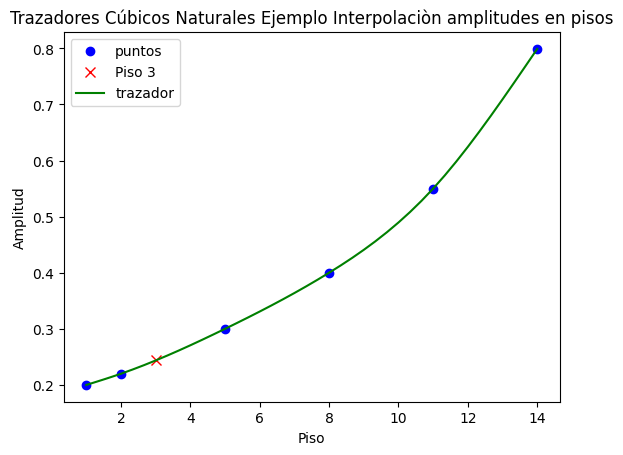

In [20]:
# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'bo', label='puntos')
plt.plot(valor,fvalor,'xr', markersize=7, label = 'Piso 3')
plt.plot(xtraza,ytraza, label='trazador'
         , color='green')
plt.title('Trazadores Cúbicos Naturales Ejemplo Interpolaciòn amplitudes en pisos')
plt.xlabel('Piso')
plt.ylabel('Amplitud')
plt.legend()
plt.show()